In [7]:
# Some imports we will need for this notebook
import Augmentor
import numpy as np
from PIL import Image
import glob
from natsort import natsorted
import os
import random
import requests
import zipfile
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [8]:
# Reading and sorting the image paths from the directories
ground_truth_images = natsorted(glob.glob('.\\jsrt_src\\train\\xray\\*'))
segmentation_mask_images = natsorted(glob.glob('.\\jsrt_src\\train\\label\\*'))

In [9]:
collated_images_and_masks = list(zip(ground_truth_images, segmentation_mask_images))
len(collated_images_and_masks)

50

In [10]:
images = [[cv2.resize(np.asarray(Image.open(x)), (512, 512)), cv2.resize(np.asarray(Image.open(y)), (512,512))] for x, y in collated_images_and_masks]

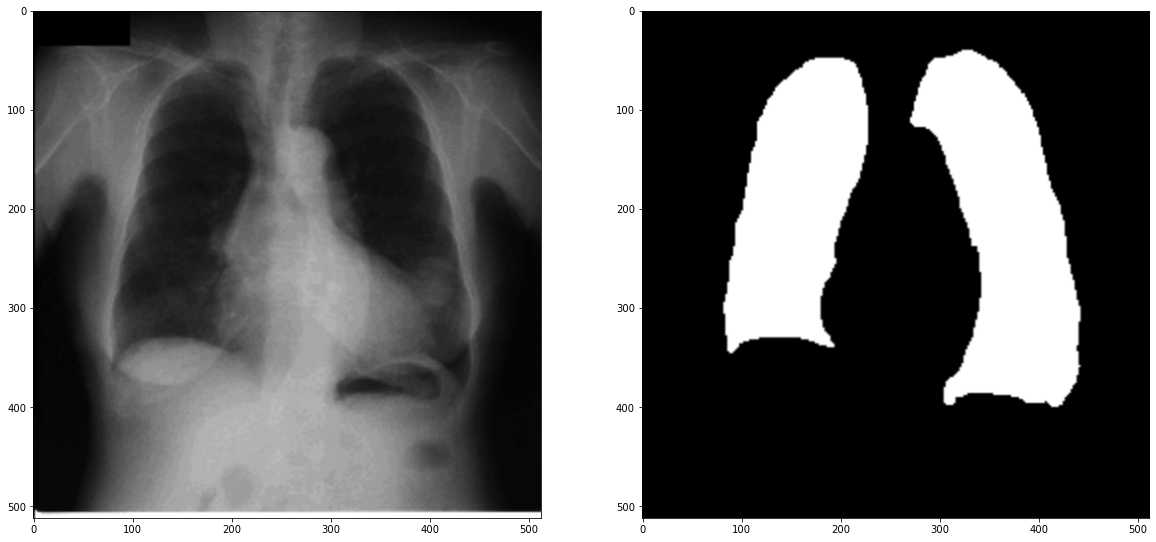

In [11]:
r_index = 0
f, axarr = plt.subplots(1, 2, figsize=(20,15))
axarr[0].imshow(images[r_index][0], cmap="gray")
axarr[1].imshow(images[r_index][1], cmap="gray");

In [12]:
AugmentationPipeline = Augmentor.DataPipeline(images)
AugmentationPipeline.random_distortion(probability=1, grid_width=5, grid_height=5, magnitude=8)
AugmentationPipeline.gaussian_distortion(probability=1, grid_width=5, grid_height=5, magnitude=8, corner='bell', method='in ')

In [13]:
augmented_images = AugmentationPipeline.sample(500)

In [15]:
Count = 1
for img, mask in augmented_images:
    imag = Image.fromarray(img)
    imag.save('.\\jsrt_src\\train_augmented\\xray\\' + str(Count) + '.png')
    mask = Image.fromarray(mask)
    mask.save('.\\jsrt_src\\train_augmented\\label\\' + str(Count) + '.png')
    Count += 1